In [1]:
# Import external packages
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot  as plt
from scipy.stats import norm
%matplotlib inline


In [2]:
ticker = 'ALV.DE'

stock_data= pd.DataFrame()
stock_data[ticker]= yf.download(ticker, start= '2000-01-01', auto_adjust=False)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [3]:
stock_data

,ALV.DE
Date,
2000-01-03,120.474022
2000-01-04,120.474022
2000-01-05,119.904846
2000-01-06,124.837654
2000-01-07,128.309570
...,...
2025-12-29,388.799988
2025-12-30,390.500000
2026-01-02,387.700012


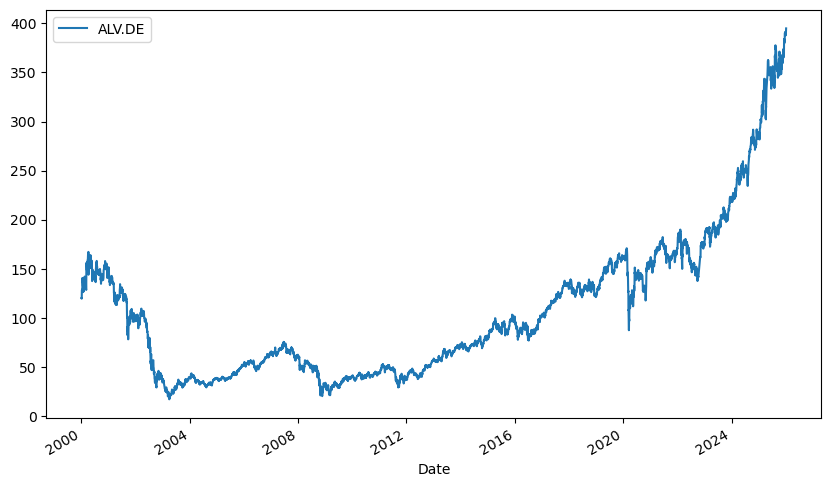

In [4]:
# plotting closing prices 
stock_data.plot(figsize=(10,6))
plt.show()


### Distributions - Calculate Historical Returns and Statistical Measures


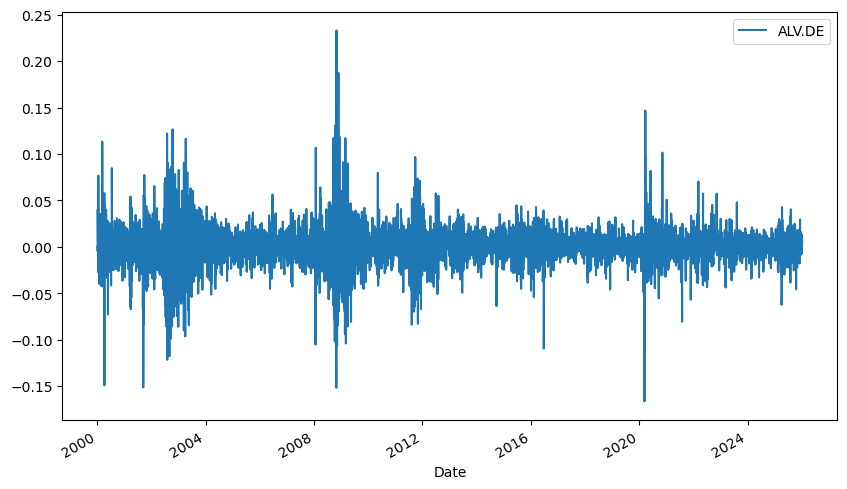

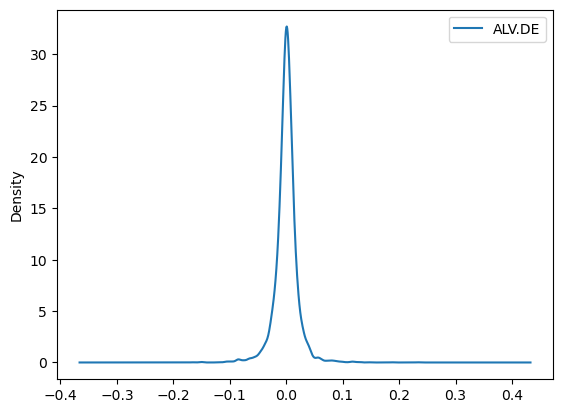

In [5]:
# Calculating historical log returns
log_returns = np.log(stock_data / stock_data.shift(1))

# all the log returns
log_returns.plot(figsize = (10,6))
plt.show()

# Show the distribution of the log returns
log_returns.plot.density()
plt.show()


In [6]:
# Calculating key statistic measures
mean = log_returns.mean()
variance = log_returns.var()
STD = log_returns.std()

In [7]:
### Simulations - Simulate Future Daily Returns and Future Prices

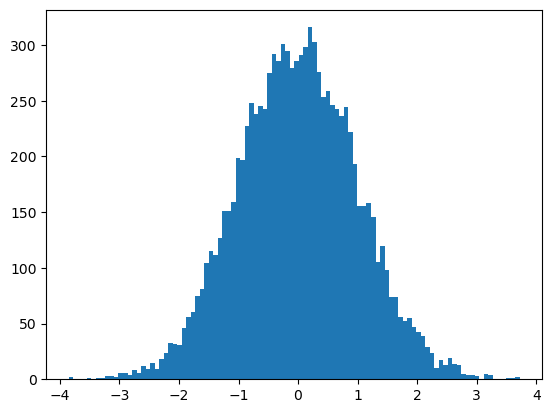

In [8]:
# Generating 10,000 random numbers betwen 0 and 1.
random_numbers = np.random.rand(10000)

# Using these randomly generated numbers to sample from a normal distribution
normal_random_numbers = norm.ppf(random_numbers)

# Plotting each of the 10,000 randombly generated numbers from the normal distribution
plt.hist(normal_random_numbers, bins = 100)
plt.show()

In [9]:
# Simulating future daily returns
t_intervals = 252
simulationns = 10000

daily_logreturns_simulated = STD.values * norm.ppf(np.random.rand(t_intervals, simulationns))
daily_simplereturns_simulated = np.exp(daily_logreturns_simulated)
daily_simplereturns_simulated.shape

(252, 10000)

In [10]:
# Calculating future price progression in each simulation using returns

# Latest known stock price for Allianz SE
last_price  = stock_data.iloc[-1]

# An array for the price simulations
price_list = np.zeros_like(daily_simplereturns_simulated)

# Set the first row to the starting stock price
price_list[0] = last_price

price_list


array([[394.70001221, 394.70001221, 394.70001221, ..., 394.70001221,
        394.70001221, 394.70001221],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

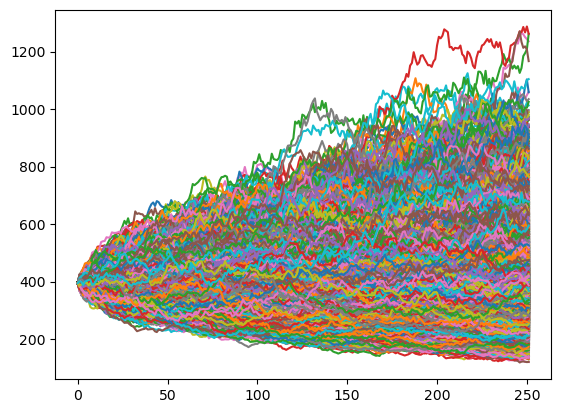

In [11]:
# Applying a for loop for simulated prices
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_simplereturns_simulated[t]

# Plot simulated future Allianz SE prices
plt.plot(price_list)
plt.show()


In [12]:
# Calculating drift
drift = mean - (0.5*variance)

# Simulating future daily returns
t_intervals = 252
simulationns = 10000

daily_logreturns_simulated = STD.values * norm.ppf(np.random.rand(t_intervals, simulationns))
daily_logreturns_simulated_withdrift = daily_logreturns_simulated + drift.values
daily_simplereturns_simulated_withdrift = np.exp(daily_logreturns_simulated_withdrift)

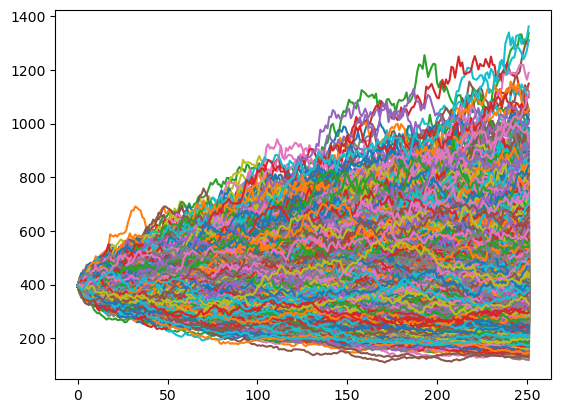

In [13]:
# Creating a variable for the latest price of Allianz SE
last_price  = stock_data.iloc[-1]


# price simulations
price_list = np.zeros_like(daily_simplereturns_simulated_withdrift)

# first row as the starting stock price
price_list[0] = last_price

# loop for simulated prices
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_simplereturns_simulated_withdrift[t]


# Plotting simulated future Allianz SE prices
plt.plot(price_list)
plt.show()

In [14]:
# Calculating worst, avg and best scenarios
WorstSim = round(price_list[-1].min(), 2)
AvgSim = round(price_list[-1].mean(), 2)
BestSim = round(price_list[-1].max(), 2)

# Examining the worst, average, and best stock price sceanrios
print('Best and Worst Cases')
print(f'Worst Simulation $/share: {WorstSim}')
print(f'Average Simulation $/share: {AvgSim}')
print(f'BestSimulation $/share: {BestSim}')

# Set up confidence intervals
Mean_Day250Prices = price_list[-1].mean()
SD_Day250Prices = price_list[-1].std()
UpperInterval_1SD = Mean_Day250Prices + 1 * SD_Day250Prices
LowerInterval_1SD = Mean_Day250Prices - 1 * SD_Day250Prices
UpperInterval_2SD = Mean_Day250Prices + 2 * SD_Day250Prices
LowerInterval_2SD = Mean_Day250Prices - 2 * SD_Day250Prices

# Print out the price range within the confidence intervals
print('\n' + 'Confidence Intervals')
print(f'1 Sigma (1 S.D.): 68% confident that price after 252 days will fall between: €{round(LowerInterval_1SD, 2)} and €{round(UpperInterval_1SD, 2)}') 
print(f'2 Sigma (2 S.D.): 95% confident that price after 252 days will fall between: €{round(LowerInterval_2SD, 2)} and €{round(UpperInterval_2SD, 2)}') 

Best and Worst Cases
Worst Simulation $/share: 119.1
Average Simulation $/share: 412.04
BestSimulation $/share: 1361.85

Confidence Intervals
1 Sigma (1 S.D.): 68% confident that price after 252 days will fall between: €275.52 and €548.57
2 Sigma (2 S.D.): 95% confident that price after 252 days will fall between: €138.99 and €685.1
